In [157]:
from arcgis.gis import GIS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [4]:
gis = GIS()

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
#for reference: https://github.com/Esri/arcgis-python-api

In [92]:
df = pd.read_csv('arc.csv',index_col=0)

In [93]:
df['location'].unique()

array(['Centro', 'Lodi / Ripamonti / Mecenate', 'Milano',
       'Bicocca / Greco / Viale Monza', 'Sempione / Certosa',
       'Porta Genova / Navigli / Corso Italia', 'Città Studi / Lambrate',
       'Porta Romana / Monte Nero', '~Altre zone',
       'Barona / Giambellino / Lorenteggio', 'Rogoredo / Chiesa Rossa',
       'Loreto / Porta Venezia / Indipendenza',
       'Garibaldi / Stazione Centrale / Isola',
       'Baggio / Forze Armate / Quinto Romano',
       'Maciachini / Zara / Niguarda', 'San Siro / Fiera',
       'Affori / Bovisa', 'Bonola / Molino Dorino / Lampugnano'],
      dtype=object)

In [94]:
#replacing places with cooardinates 
df = df.replace('Centro', "45.464204, 9.174259")
df = df.replace('Milano', '45.464204, 9.174259')
df = df.replace('Lodi / Ripamonti / Mecenate', '45.453840, 9.207265')
df = df.replace('Bicocca / Greco / Viale Monza', '45.519709, 9.196380')
df = df.replace('Sempione / Certosa', '45.472194, 9.161677')
df = df.replace('Porta Genova / Navigli / Corso Italia', '45.456462, 9.159857')
df = df.replace('Porta Romana / Monte Nero', '45.453449, 9.208381')
df = df.replace('Barona / Giambellino / Lorenteggio', '45.458086, 9.146773')
df = df.replace('Rogoredo / Chiesa Rossa', '45.431014, 9.231579')
df = df.replace('Loreto / Porta Venezia / Indipendenza', '45.485280, 9.224120')
df = df.replace('Garibaldi / Stazione Centrale / Isola', '45.484790, 9.198360')
df = df.replace('Baggio / Forze Armate / Quinto Romano', '45.456096, 9.087164')
df = df.replace('Maciachini / Zara / Niguarda', '45.496670, 9.185695')
df = df.replace('San Siro / Fiera', '45.485561, 9.077715')
df = df.replace('Affori / Bovisa', '45.516957, 9.120770')
df = df.replace('Bonola / Molino Dorino / Lampugnano', '45.497337, 9.105851')
df = df.replace('Città Studi / Lambrate', '45.477768, 9.221365')

In [95]:
#deleting unidentified places
df = df[df.location != '~Altre zone']

In [96]:
#splitting the cooardinates
loc = df.location.str.split(expand=True)
#rename the columns
loc = loc.rename(columns={0: "latitude", 1: "longitude"})

,0,1
0,"45.464204,",9.174259
1,"45.453840,",9.207265
3,"45.464204,",9.174259
4,"45.464204,",9.174259
5,"45.519709,",9.196380
...,...,...
446,"45.458086,",9.146773
450,"45.464204,",9.174259
453,"45.456462,",9.159857
456,"45.464204,",9.174259


In [98]:
#adding them to the original dataframe
df['latitude'] = loc['latitude']
df['longitude'] = loc['longitude']

In [100]:
df

,price,area,date,latitude,longitude
0,500.0,123.0,2020-03-28,"45.464204,",9.174259
1,635.0,60.0,2020-04-15,"45.453840,",9.207265
3,1300.0,45.0,2020-04-15,"45.464204,",9.174259
4,520.0,35.0,2020-04-15,"45.464204,",9.174259
5,500.0,80.0,2020-04-14,"45.519709,",9.196380
...,...,...,...,...,...
446,760.0,70.0,2020-01-12,"45.458086,",9.146773
450,750.0,44.0,2020-01-12,"45.464204,",9.174259
453,350.0,40.0,2020-01-11,"45.456462,",9.159857
456,1166.0,50.0,2020-01-07,"45.464204,",9.174259


In [101]:
#converting the cooardinates to floats
df['latitude'] = df['latitude'].apply(lambda x: x.replace('', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)

In [102]:
df['longitude'] = df['longitude'].astype(float)

In [161]:
#splitting the data againg
dfb = df[(df['date'] < '2020-02-21')]
dfa = df[(df['date'] >= '2020-02-21')]

In [163]:
#Convert to Spatially Enabled DataFrame
dfb = pd.DataFrame.spatial.from_xy(dfb, 'longitude','latitude')
dfa = pd.DataFrame.spatial.from_xy(dfa, 'longitude','latitude')

In [207]:
pdx_map = gis.map('Milan')
pdx_map.basemap = 'streets'
pdx_map

MapView(layout=Layout(height='400px', width='100%'))

In [208]:
dfb.spatial.plot(map_widget=pdx_map)
dfa.spatial.plot(map_widget=pdx_map)

True

In [209]:
#visualizes the spatial density of the properties (houses) using a heatmap
pdx_density_map = gis.map('Milan')
pdx_density_map.basemap='gray'
pdx_density_map

MapView(layout=Layout(height='400px', width='100%'))

In [210]:
dfb.spatial.plot(map_widget=pdx_density_map, renderer_type='h')

True

In [176]:
pdx_density_map1 = gis.map('Milan')
pdx_density_map1.basemap='gray'
pdx_density_map1

MapView(layout=Layout(height='400px', width='100%'))

In [177]:
dfa.spatial.plot(map_widget=pdx_density_map1,renderer_type='h')

True

In [184]:
#Visualize spatial distribution by price
pdx_price_map = gis.map("Milan")
pdx_price_map.basemap = 'gray-vector'
pdx_price_map

MapView(layout=Layout(height='400px', width='100%'))

In [185]:
dfb.spatial.plot(map_widget = pdx_price_map, 
                      renderer_type='c', # for classs breaks renderer
                     method='esriClassifyQuantile',  # classification scheme
                     class_count=10,  # between 1900 - 2000, each decade in a class
                     col='price',
                     cmap='BuPu_r',  # matplotlib color map
                     alpha=0.5,
                     outline_color=[50,0,0,50], line_width=1)

True

In [182]:
pdx_price_map1 = gis.map("Milan")
pdx_price_map1.basemap = 'gray-vector'
pdx_price_map1

MapView(layout=Layout(height='400px', width='100%'))

In [183]:
dfa.spatial.plot(map_widget = pdx_price_map1, 
                      renderer_type='c', # for classs breaks renderer
                     method='esriClassifyQuantile',  # classification scheme
                     class_count=10,  # between 1900 - 2000, each decade in a class
                     col='price',
                     cmap='BuPu_r',  # matplotlib color map
                     alpha=0.5,
                     outline_color=[50,0,0,50], line_width=1)

True

Text(0.5, 1.0, 'Histogram of PRICE column Before')

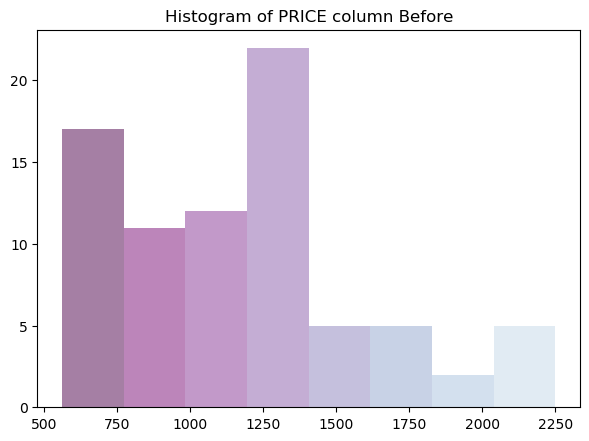

In [243]:
#creating the legend
price_class_breaks = pdx_price_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
# print(len(age_class_breaks))
cbs_list = []
cmap_list = []
for cb in price_class_breaks:
#     print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])
    
# build a histogram for the same class breaks
n, bins, patches = plt.hist(dfb['price'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of PRICE column Before')

Text(0.5, 1.0, 'Histogram of PRICE column After')

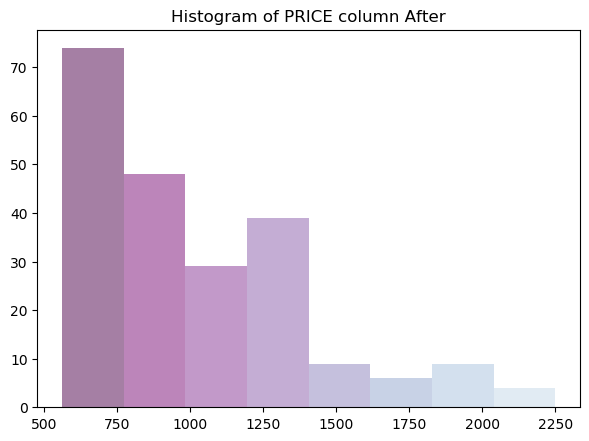

In [244]:
price_class_breaks = pdx_price_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
# print(len(age_class_breaks))
cbs_list = []
cmap_list = []
for cb in price_class_breaks:
#     print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])
    
# build a histogram for the same class breaks
n, bins, patches = plt.hist(dfa['price'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of PRICE column After')

In [216]:
pdx_size_map = gis.map("Milan")
pdx_size_map.basemap = 'gray-vector'
pdx_size_map

MapView(layout=Layout(height='400px', width='100%'))

In [240]:
dfb.spatial.plot(map_widget = pdx_size_map, 
                      renderer_type='c', # for classs breaks renderer
                     method='esriClassifyNaturalBreaks',  # classification scheme
                     class_count=10,  # between 1900 - 2000, each decade in a class
                     col='area',
                     cmap='RdBu',  # matplotlib color map
                     alpha=0.7,
                     outline_color=[50,0,0,50], line_width=1)

True

In [237]:
pdx_size_map1 = gis.map("Milan")
pdx_size_map1.basemap = 'gray-vector'
pdx_size_map1

MapView(layout=Layout(height='400px', width='100%'))

In [239]:
dfa.spatial.plot(map_widget = pdx_size_map1, 
                      renderer_type='c', # for classs breaks renderer
                     method='esriClassifyNaturalBreaks',  # classification scheme
                     class_count=10,  # between 1900 - 2000, each decade in a class
                     col='area',
                     cmap='RdBu',  # matplotlib color map
                     alpha=0.7,
                     outline_color=[50,0,0,50], line_width=1)

True

Text(0.5, 1.0, 'Histogram of area column Before')

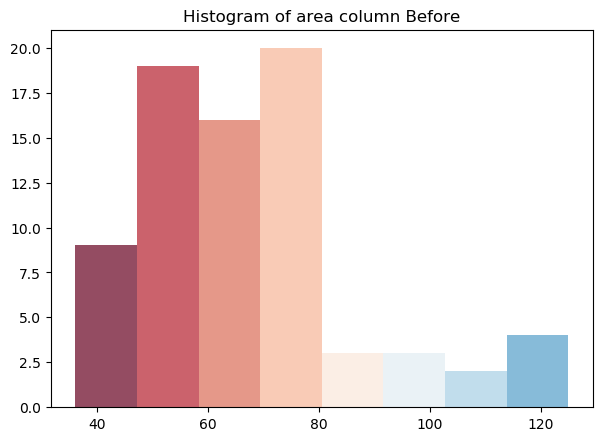

In [245]:
size_class_breaks = pdx_size_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
# print(len(age_class_breaks))
cbs_list = []
cmap_list = []
for cb in size_class_breaks:
#     print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])
    
# build a histogram for the same class breaks
n, bins, patches = plt.hist(dfb['area'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of area column Before')

Text(0.5, 1.0, 'Histogram of area column After')

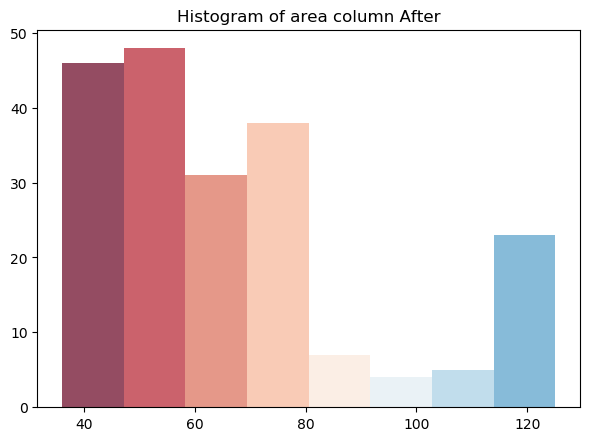

In [246]:
size_class_breaks = pdx_size_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
# print(len(age_class_breaks))
cbs_list = []
cmap_list = []
for cb in size_class_breaks:
#     print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])
    
# build a histogram for the same class breaks
n, bins, patches = plt.hist(dfa['area'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of area column After')